In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

Read the Dataset

In [ ]:
data = pd.read_csv('indian_liver_patient.csv')
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
print(data.head())


   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [ ]:
print(data.shape)
print("no of rows:",data.shape[0])
print("no of columns:",data.shape[1])
print("total no of data:",data.size)

(583, 11)
no of rows: 583
no of columns: 11
total no of data: 6413


In [ ]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Data Cleaning

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [ ]:
data.duplicated().sum()

13

In [ ]:
data=data.drop_duplicates()
print(data.shape)


(570, 11)


Handling Missing Values

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB
None


In [ ]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [ ]:
print(data.isnull().sum())


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [ ]:
print(data.isnull().sum().sum())


4


<Axes: xlabel='Albumin_and_Globulin_Ratio'>

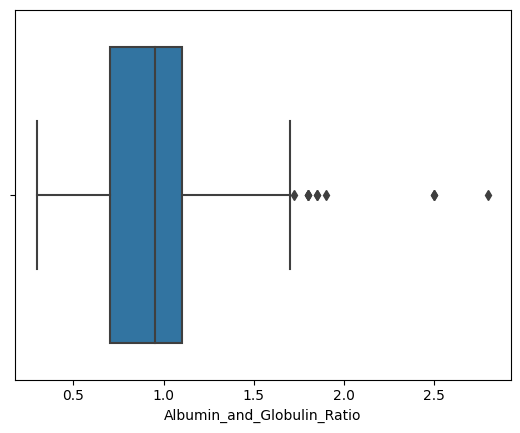

In [ ]:
sns.boxplot(data=data,x='Albumin_and_Globulin_Ratio')

filling null values

In [ ]:
data['Albumin_and_Globulin_Ratio'].mode()

0    1.0
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [ ]:
data['Albumin_and_Globulin_Ratio'].median()

0.95

In [ ]:
data['Albumin_and_Globulin_Ratio'].mean()

0.9480035335689044

In [ ]:
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [ ]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Male vs Female

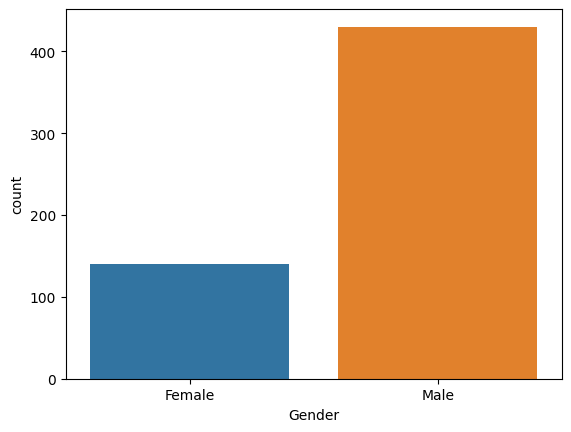

In [ ]:
import seaborn as sns
sns.countplot(data=data,x='Gender',label='count')
plt.show()

In [ ]:
Male,Female=data['Gender'].value_counts()
print('Number pf patients that are male:',Male)
print('Number pf patients that are female:',Female)

Number pf patients that are male: 430
Number pf patients that are female: 140


handling categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Gender']=lc.fit_transform(data['Gender'])
data

<ipython-input-28-50b6123f7c1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender']=lc.fit_transform(data['Gender'])


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
def partition(x):
  if x==2:
    return 0
  return 1

data['Dataset']=data['Dataset'].map(partition)

<ipython-input-29-52c8393cc948>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dataset']=data['Dataset'].map(partition)


In [ ]:
data['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 570, dtype: int64

<Axes: >

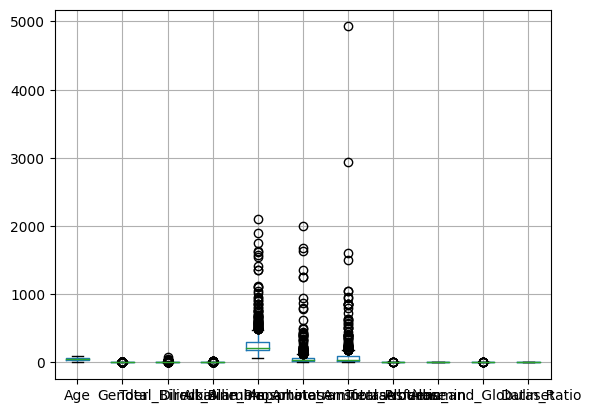

In [ ]:
data.boxplot()

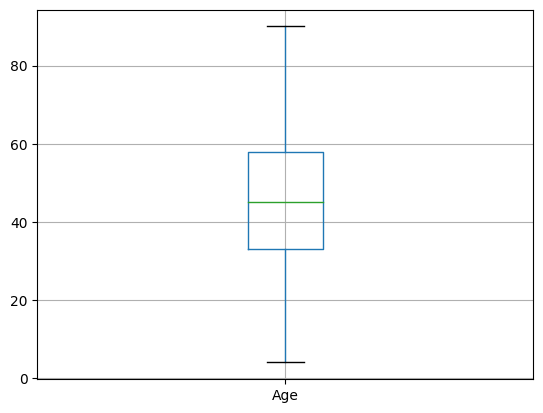

In [ ]:
data.boxplot(column="Age")
plt.show()

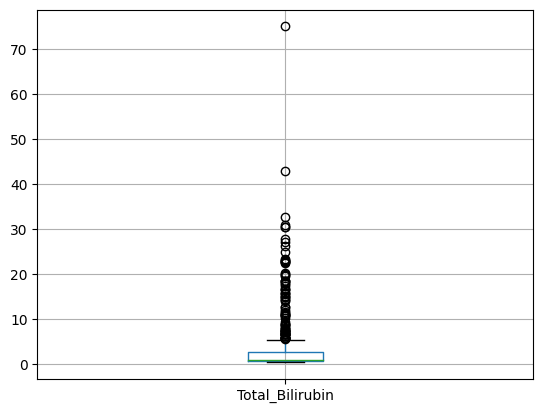

In [ ]:
data.boxplot(column="Total_Bilirubin")
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lwr_bound=q1-(1.5*IQR)
  upr_bound=q3+(1.5*IQR)
  return lwr_bound,upr_bound

In [ ]:
low,high=remove_outlier(data["Total_Bilirubin"])

In [ ]:
data["Total_Bilirubin"]=np.where(data["Total_Bilirubin"]>high,high,data["Total_Bilirubin"])

<ipython-input-37-91ea29f105ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Total_Bilirubin"]=np.where(data["Total_Bilirubin"]>high,high,data["Total_Bilirubin"])


In [ ]:
data["Total_Bilirubin"]=np.where(data["Total_Bilirubin"]<low,low,data["Total_Bilirubin"])

<ipython-input-38-104486ca1ba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Total_Bilirubin"]=np.where(data["Total_Bilirubin"]<low,low,data["Total_Bilirubin"])


<Axes: >

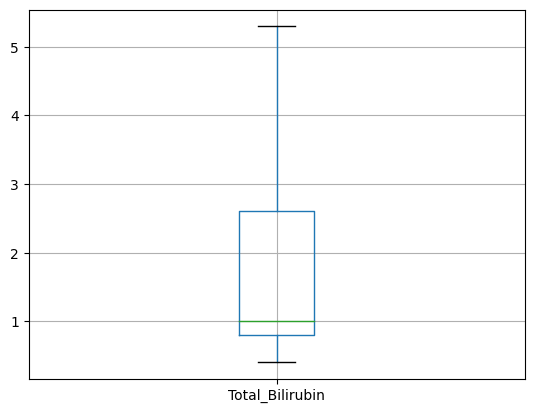

In [ ]:
data.boxplot(column="Total_Bilirubin")

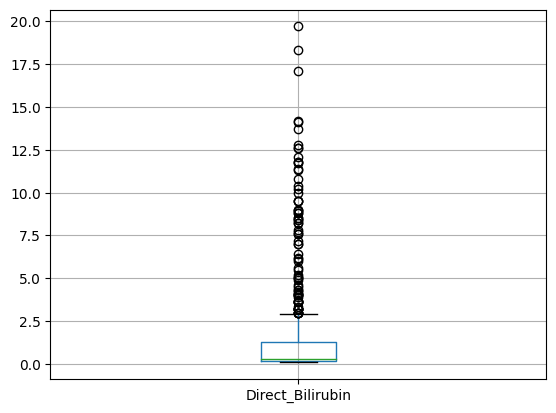

In [ ]:
data.boxplot(column="Direct_Bilirubin")
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lwr_bound=q1-(1.5*IQR)
  upr_bound=q3+(1.5*IQR)
  return lwr_bound,upr_bound

In [ ]:
low,high=remove_outlier(data["Direct_Bilirubin"])

In [ ]:
data["Direct_Bilirubin"]=np.where(data["Direct_Bilirubin"]>high,high,data["Direct_Bilirubin"])

<ipython-input-43-e7fd280fbd74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Direct_Bilirubin"]=np.where(data["Direct_Bilirubin"]>high,high,data["Direct_Bilirubin"])


In [ ]:
data["Direct_Bilirubin"]=np.where(data["Direct_Bilirubin"]<low,low,data["Direct_Bilirubin"])

<ipython-input-44-80e6442c98a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Direct_Bilirubin"]=np.where(data["Direct_Bilirubin"]<low,low,data["Direct_Bilirubin"])


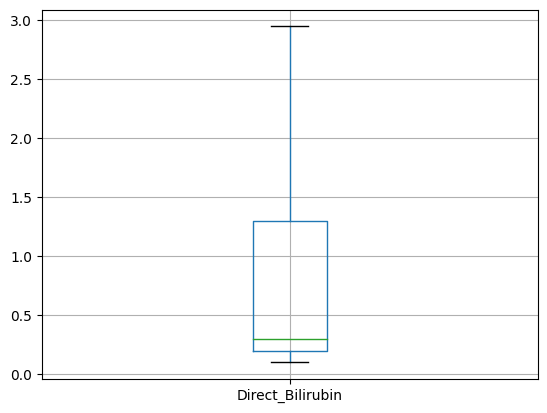

In [ ]:
data.boxplot(column="Direct_Bilirubin")
plt.show()

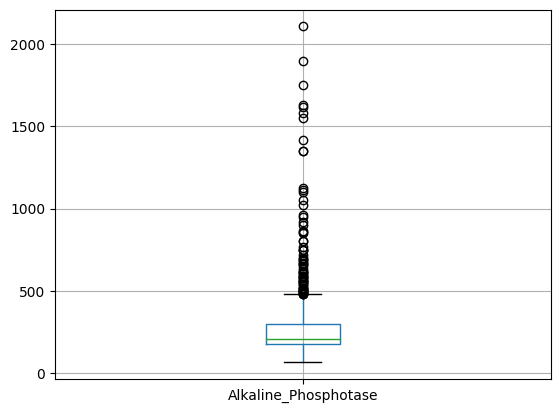

In [ ]:
data.boxplot(column="Alkaline_Phosphotase")
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lwr_bound=q1-(1.5*IQR)
  upr_bound=q3+(1.5*IQR)
  return lwr_bound,upr_bound

In [ ]:
low,high=remove_outlier(data["Alkaline_Phosphotase"])

In [ ]:
data["Alkaline_Phosphotase"]=np.where(data["Alkaline_Phosphotase"]>high,high,data["Alkaline_Phosphotase"])

<ipython-input-49-52d9b95c158e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Alkaline_Phosphotase"]=np.where(data["Alkaline_Phosphotase"]>high,high,data["Alkaline_Phosphotase"])


In [ ]:
data["Alkaline_Phosphotase"]=np.where(data["Alkaline_Phosphotase"]<low,low,data["Alkaline_Phosphotase"])

<ipython-input-50-43127528b796>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Alkaline_Phosphotase"]=np.where(data["Alkaline_Phosphotase"]<low,low,data["Alkaline_Phosphotase"])


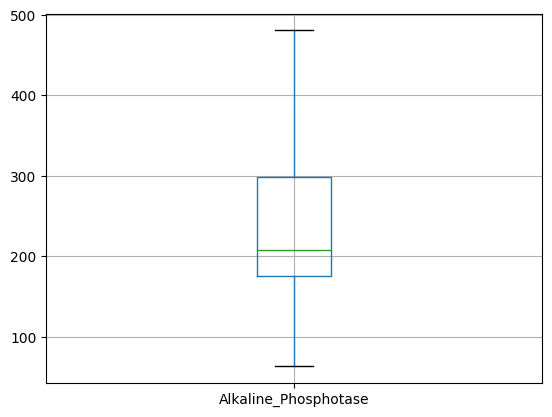

In [ ]:
data.boxplot(column="Alkaline_Phosphotase")
plt.show()

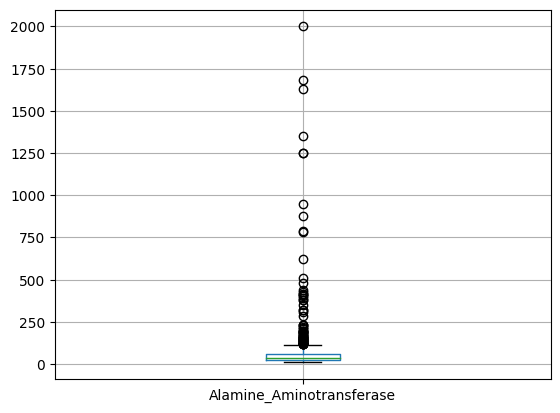

In [ ]:
data.boxplot(column="Alamine_Aminotransferase")
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lwr_bound=q1-(1.5*IQR)
  upr_bound=q3+(1.5*IQR)
  return lwr_bound,upr_bound

In [ ]:
low,high=remove_outlier(data["Alamine_Aminotransferase"])

In [ ]:
data["Alamine_Aminotransferase"]=np.where(data["Alamine_Aminotransferase"]>high,high,data["Alamine_Aminotransferase"])

<ipython-input-55-11ec63d28789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Alamine_Aminotransferase"]=np.where(data["Alamine_Aminotransferase"]>high,high,data["Alamine_Aminotransferase"])


In [ ]:
data["Alamine_Aminotransferase"]=np.where(data["Alamine_Aminotransferase"]<low,low,data["Alamine_Aminotransferase"])

<ipython-input-56-08512cadbdd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Alamine_Aminotransferase"]=np.where(data["Alamine_Aminotransferase"]<low,low,data["Alamine_Aminotransferase"])


<Axes: >

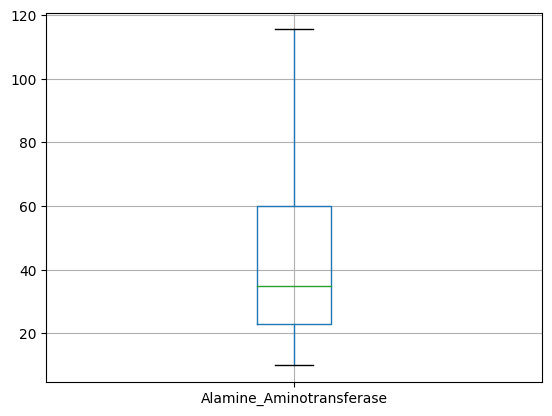

In [ ]:
data.boxplot(column="Alamine_Aminotransferase")

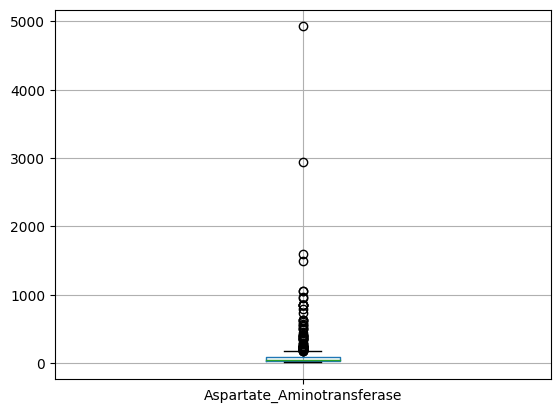

In [ ]:
data.boxplot(column="Aspartate_Aminotransferase")
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lwr_bound=q1-(1.5*IQR)
  upr_bound=q3+(1.5*IQR)
  return lwr_bound,upr_bound

In [ ]:
low,high=remove_outlier(data["Aspartate_Aminotransferase"])

In [ ]:
data["Aspartate_Aminotransferase"]=np.where(data["Aspartate_Aminotransferase"]>high,high,data["Aspartate_Aminotransferase"])

<ipython-input-62-db26ec252602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Aspartate_Aminotransferase"]=np.where(data["Aspartate_Aminotransferase"]>high,high,data["Aspartate_Aminotransferase"])


In [ ]:
data["Aspartate_Aminotransferase"]=np.where(data["Aspartate_Aminotransferase"]<low,low,data["Aspartate_Aminotransferase"])

<ipython-input-63-c6baa14969a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Aspartate_Aminotransferase"]=np.where(data["Aspartate_Aminotransferase"]<low,low,data["Aspartate_Aminotransferase"])


<Axes: >

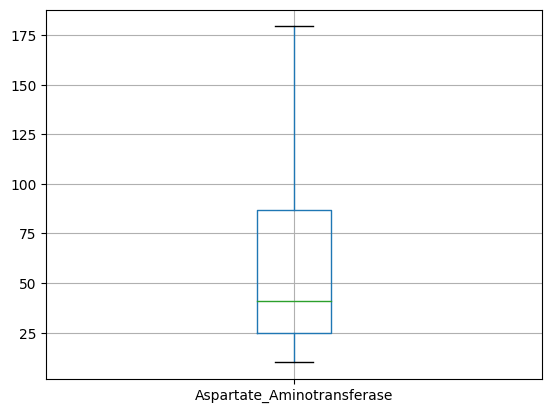

In [ ]:
data.boxplot(column="Aspartate_Aminotransferase")

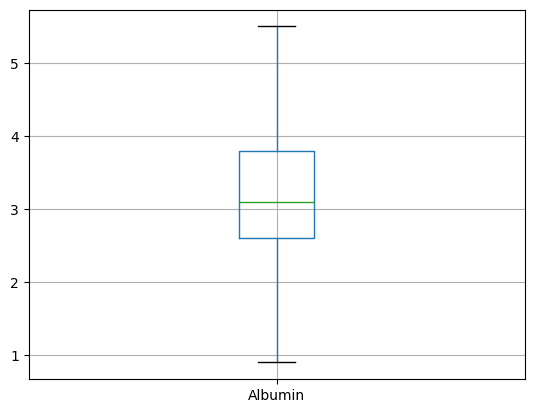

In [ ]:
data.boxplot(column="Albumin")
plt.show()

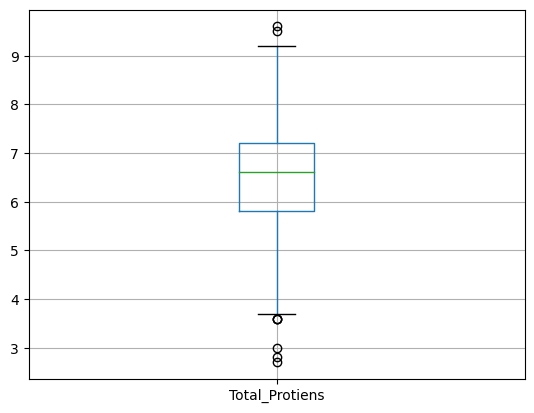

In [ ]:
data.boxplot(column="Total_Protiens")
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lwr_bound=q1-(1.5*IQR)
  upr_bound=q3+(1.5*IQR)
  return lwr_bound,upr_bound

In [ ]:
low,high=remove_outlier(data["Total_Protiens"])

In [ ]:
data["Total_Protiens"]=np.where(data["Total_Protiens"]>high,high,data["Total_Protiens"])

<ipython-input-69-2bf6c08ed11a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Total_Protiens"]=np.where(data["Total_Protiens"]>high,high,data["Total_Protiens"])


In [ ]:
data["Total_Protiens"]=np.where(data["Total_Protiens"]<low,low,data["Total_Protiens"])

<ipython-input-70-2657a79f468f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Total_Protiens"]=np.where(data["Total_Protiens"]<low,low,data["Total_Protiens"])


<Axes: >

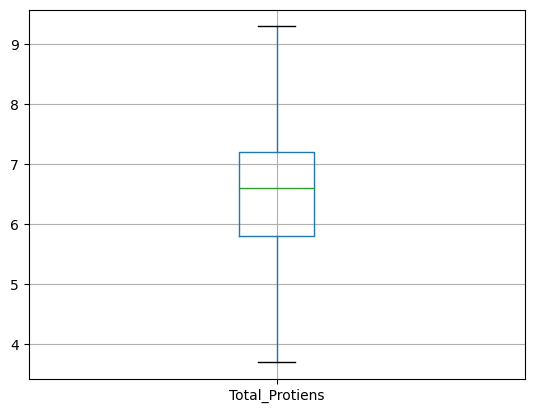

In [ ]:
data.boxplot(column="Total_Protiens")

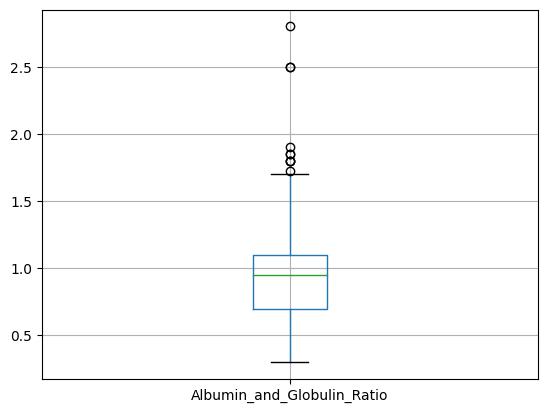

In [ ]:
data.boxplot(column="Albumin_and_Globulin_Ratio")
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lwr_bound=q1-(1.5*IQR)
  upr_bound=q3+(1.5*IQR)
  return lwr_bound,upr_bound

In [ ]:
low,high=remove_outlier(data["Albumin_and_Globulin_Ratio"])

In [ ]:
data["Albumin_and_Globulin_Ratio"]=np.where(data["Albumin_and_Globulin_Ratio"]>high,high,data["Albumin_and_Globulin_Ratio"])

<ipython-input-75-5deb47f83e25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Albumin_and_Globulin_Ratio"]=np.where(data["Albumin_and_Globulin_Ratio"]>high,high,data["Albumin_and_Globulin_Ratio"])


In [ ]:
data["Albumin_and_Globulin_Ratio"]=np.where(data["Albumin_and_Globulin_Ratio"]<low,low,data["Albumin_and_Globulin_Ratio"])

<ipython-input-76-022e23222ee6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Albumin_and_Globulin_Ratio"]=np.where(data["Albumin_and_Globulin_Ratio"]<low,low,data["Albumin_and_Globulin_Ratio"])


<Axes: >

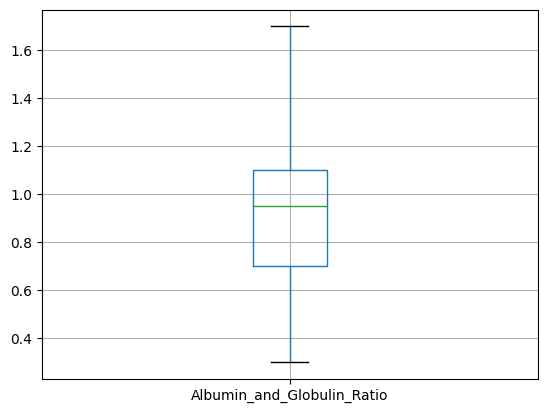

In [ ]:
data.boxplot(column="Albumin_and_Globulin_Ratio")

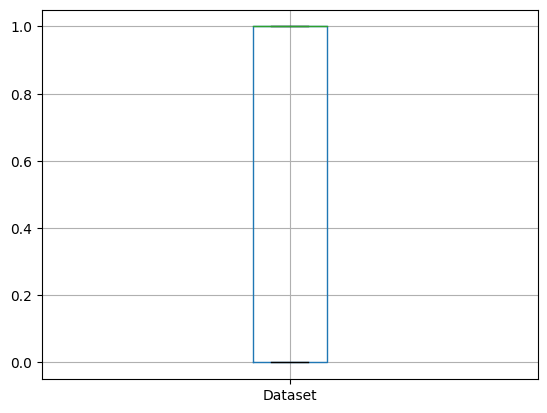

In [ ]:
data.boxplot(column="Dataset")
plt.show()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

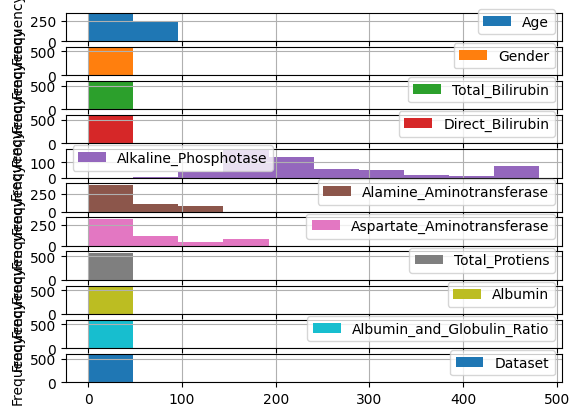

In [ ]:
data.plot.hist(subplots=True,grid=True)

In [ ]:
data.dtypes

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase    float64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [ ]:
data.skew()

Age                          -0.046597
Gender                       -1.185073
Total_Bilirubin               1.222655
Direct_Bilirubin              1.252807
Alkaline_Phosphotase          1.031079
Alamine_Aminotransferase      1.081600
Aspartate_Aminotransferase    1.198754
Total_Protiens               -0.228039
Albumin                      -0.060829
Albumin_and_Globulin_Ratio    0.347884
Dataset                      -0.940320
dtype: float64

In [ ]:
data.mode()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,1,0.8,0.2,481.0,115.5,179.375,7.0,3.0,1.0,1


In [ ]:
data.mean()

Age                            44.849123
Gender                          0.754386
Total_Bilirubin                 1.919298
Direct_Bilirubin                0.880000
Alkaline_Phosphotase          251.445614
Alamine_Aminotransferase       47.535088
Aspartate_Aminotransferase     64.283772
Total_Protiens                  6.500526
Albumin                         3.148947
Albumin_and_Globulin_Ratio      0.941842
Dataset                         0.712281
dtype: float64

In [ ]:
data.median()

Age                            45.00
Gender                          1.00
Total_Bilirubin                 1.00
Direct_Bilirubin                0.30
Alkaline_Phosphotase          208.00
Alamine_Aminotransferase       35.00
Aspartate_Aminotransferase     41.00
Total_Protiens                  6.60
Albumin                         3.10
Albumin_and_Globulin_Ratio      0.95
Dataset                         1.00
dtype: float64

In [ ]:
data.kurtosis()

Age                          -0.565802
Gender                       -0.597712
Total_Bilirubin              -0.065252
Direct_Bilirubin              0.020904
Alkaline_Phosphotase         -0.064894
Alamine_Aminotransferase     -0.153063
Aspartate_Aminotransferase    0.075977
Total_Protiens               -0.103618
Albumin                      -0.373112
Albumin_and_Globulin_Ratio    0.006487
Dataset                      -1.119740
dtype: float64

In [ ]:
data._get_numeric_data()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.10,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,1,5.3,2.95,481.0,64.0,100.0,7.5,3.2,0.74,1
2,62,1,5.3,2.95,481.0,60.0,68.0,7.0,3.3,0.89,1
3,58,1,1.0,0.40,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,1,3.9,2.00,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.10,481.0,20.0,34.0,5.9,1.6,0.37,0
579,40,1,0.6,0.10,98.0,35.0,31.0,6.0,3.2,1.10,1
580,52,1,0.8,0.20,245.0,48.0,49.0,6.4,3.2,1.00,1
581,31,1,1.3,0.50,184.0,29.0,32.0,6.8,3.4,1.00,1


Descriptive Statistical

In [ ]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,0.754386,1.919298,0.880000,251.445614,47.535088,64.283772,6.500526,3.148947,0.941842,0.712281
std,16.242182,0.430829,1.653184,0.995854,109.890414,32.981216,53.433316,1.070806,0.796813,0.295851,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,3.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,5.300000,2.950000,481.000000,115.500000,179.375000,9.300000,5.500000,1.700000,1.000000


Visual Analysis

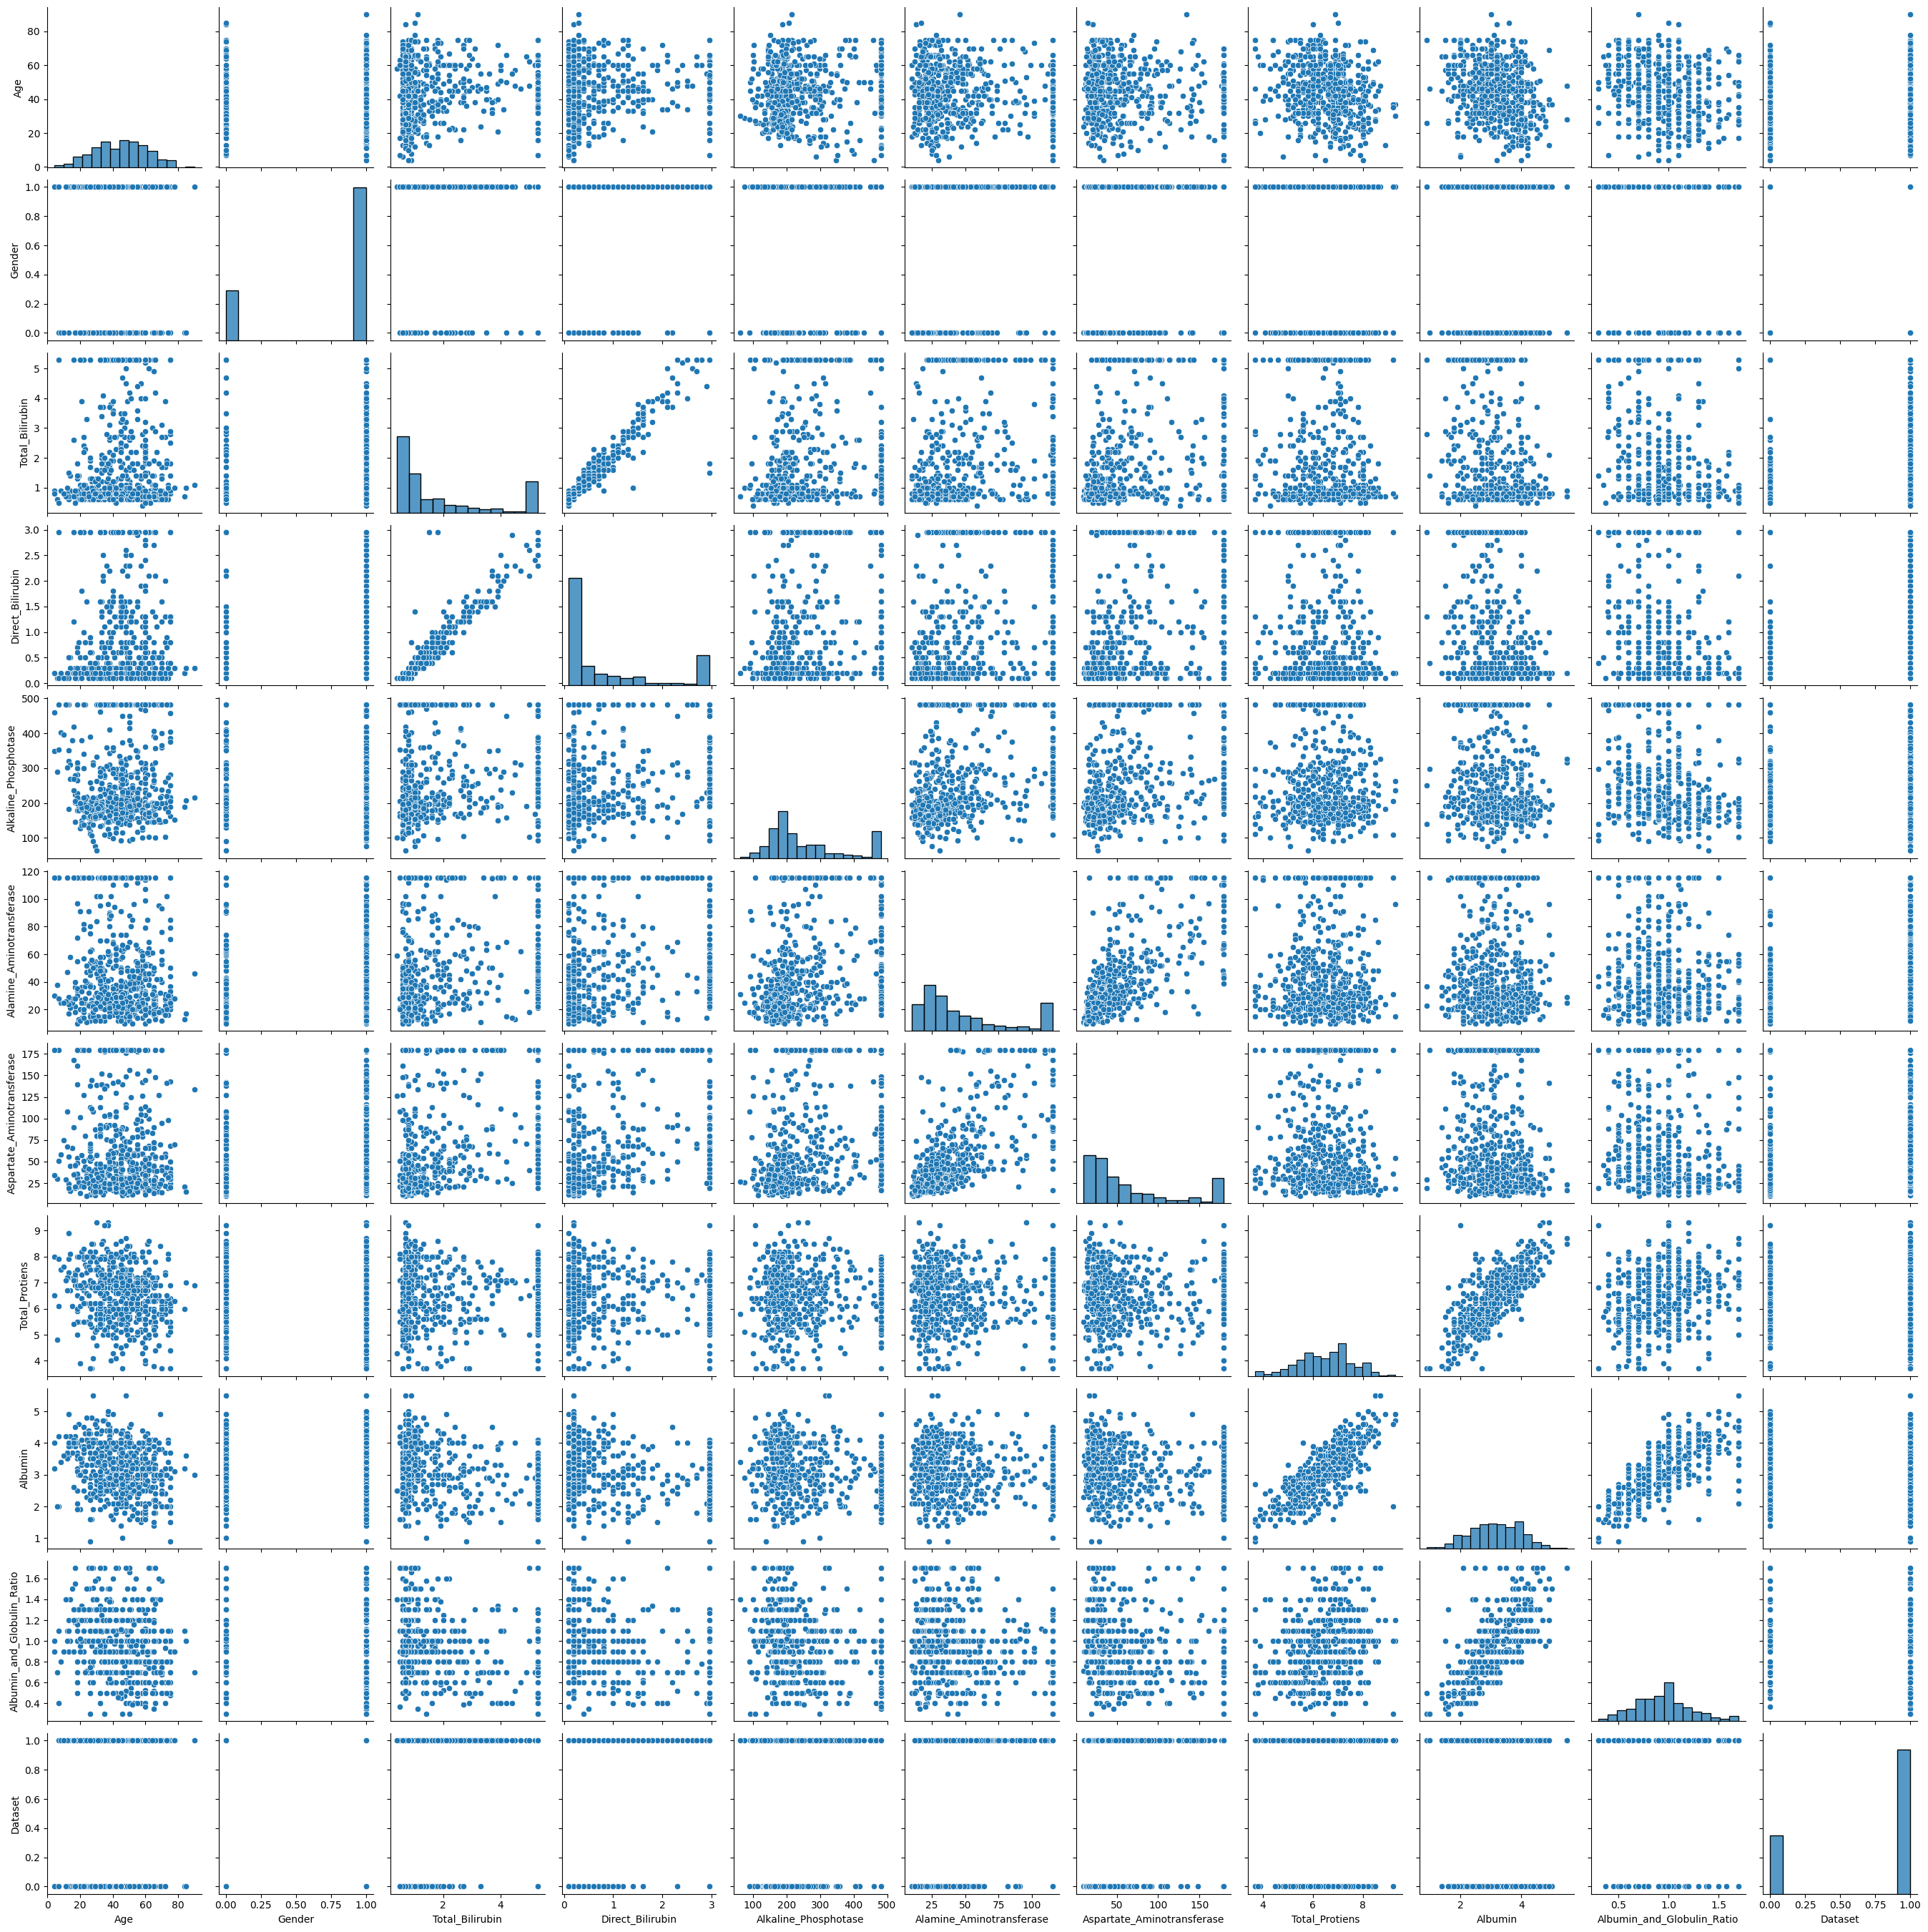

In [ ]:
sns.pairplot(data)

In [ ]:
corelation=data.corr()

Multivariate Analysis

<Axes: >

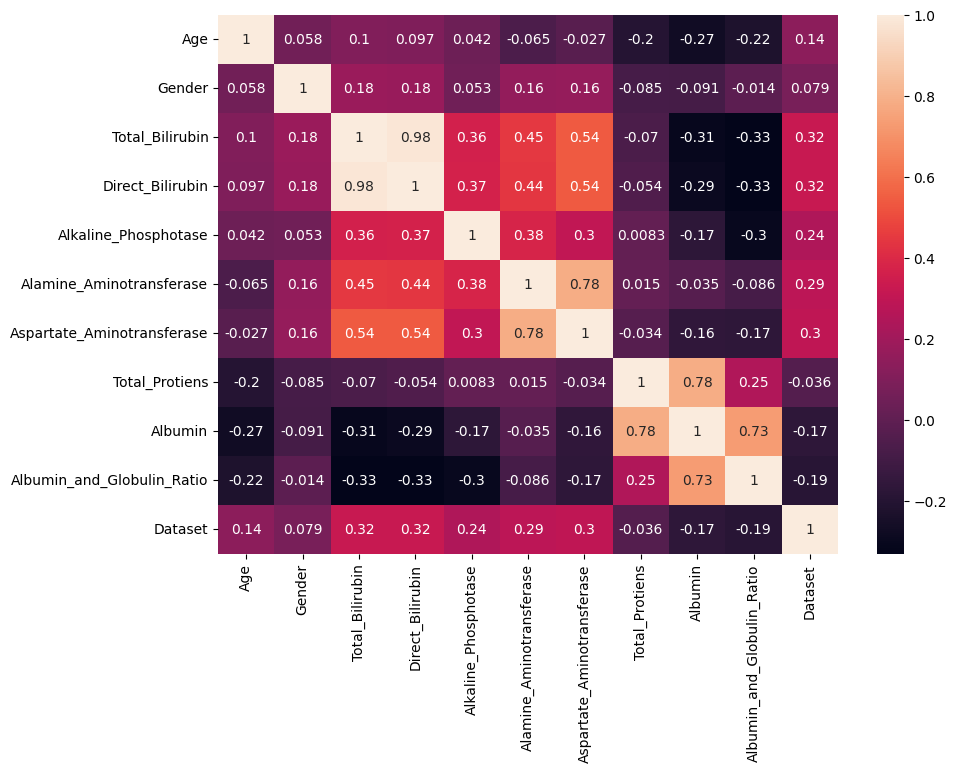

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

Univariate Analysis

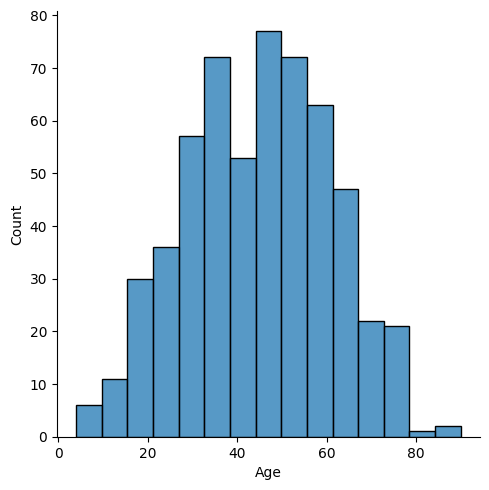

In [ ]:
sns.displot(data['Age'])

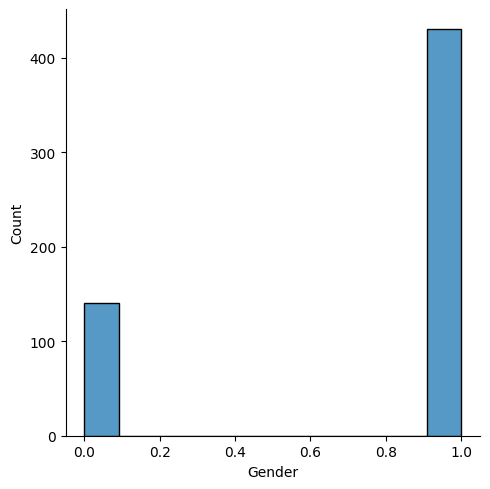

In [ ]:
sns.displot(data['Gender'])

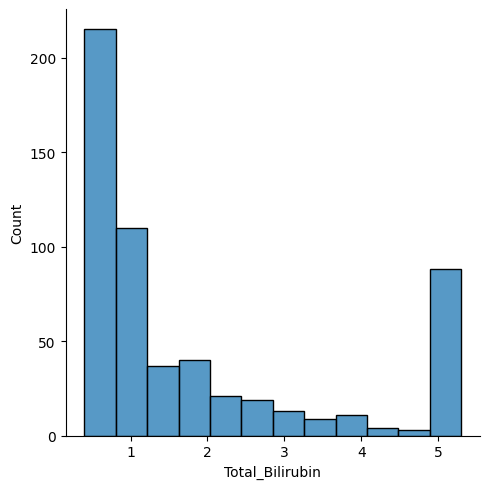

In [ ]:
sns.displot(data['Total_Bilirubin'])

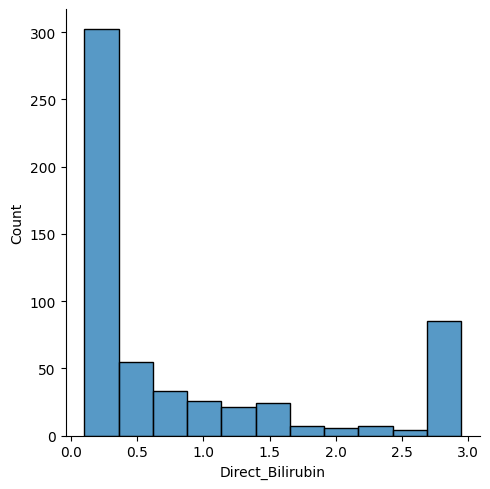

In [ ]:
sns.displot(data['Direct_Bilirubin'])

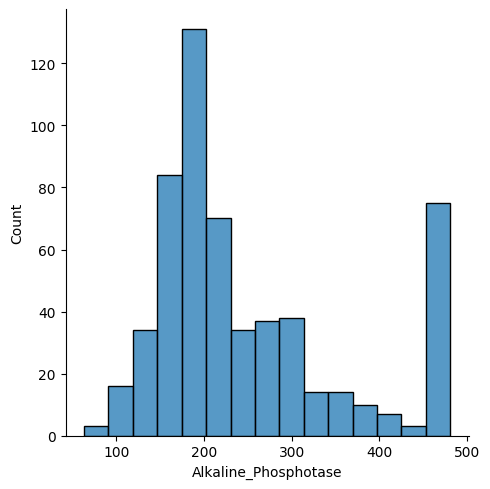

In [ ]:
sns.displot(data['Alkaline_Phosphotase'])

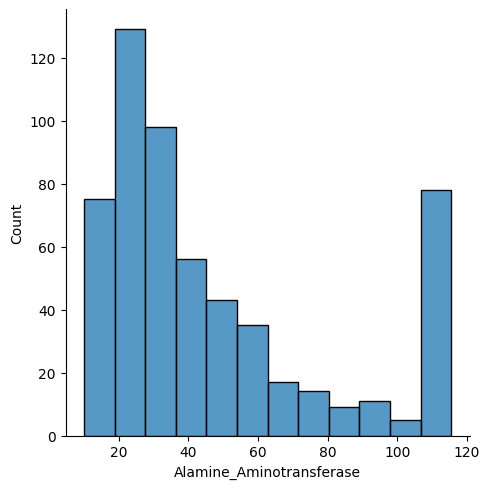

In [ ]:
sns.displot(data['Alamine_Aminotransferase'])

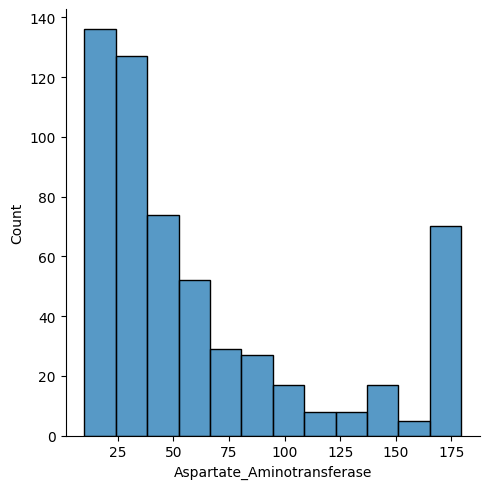

In [ ]:
sns.displot(data['Aspartate_Aminotransferase'])

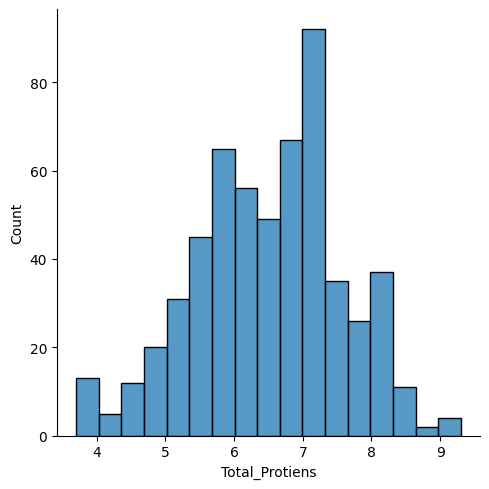

In [ ]:
sns.displot(data['Total_Protiens'])

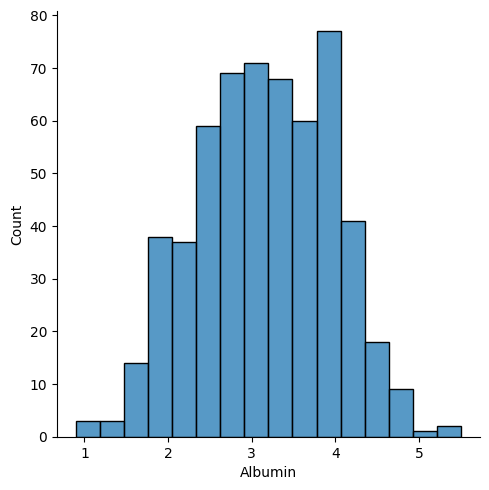

In [ ]:
sns.displot(data['Albumin'])

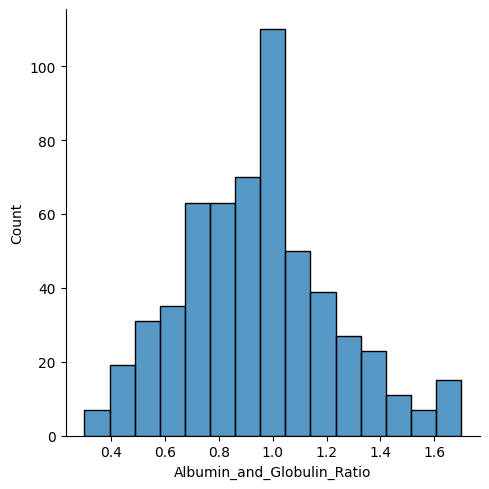

In [ ]:
sns.displot(data['Albumin_and_Globulin_Ratio'])

Bivariate Analysis

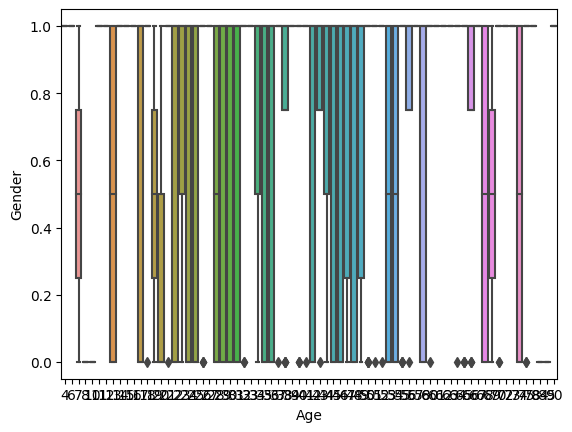

In [ ]:
#boxplot
sns.boxplot(x='Age',y='Gender',data=data)
plt.show()

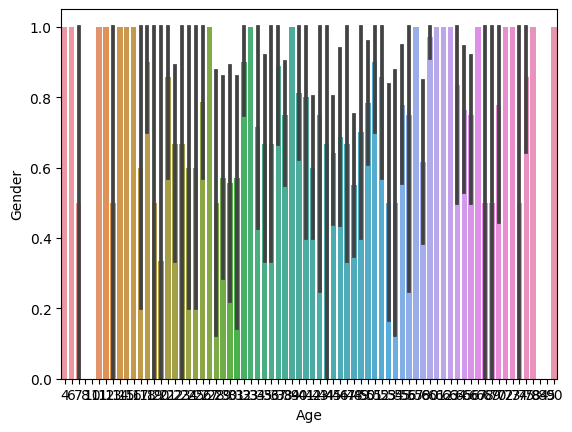

In [ ]:
#barplot
sns.barplot(x='Age',y='Gender',data=data)
plt.show()

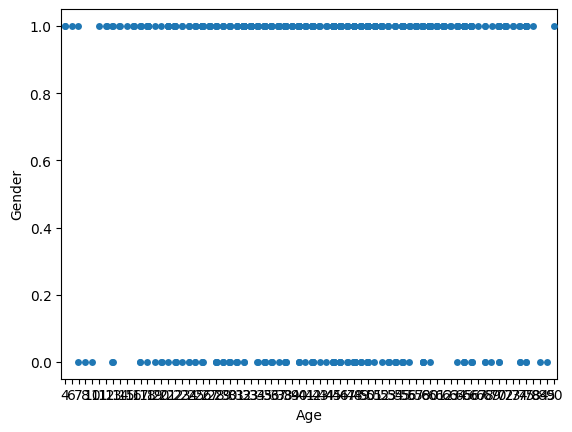

In [ ]:
#stripplot
sns.stripplot(x='Age',y='Gender',data=data)
plt.show()

Data Preparation

In [ ]:
x=data.iloc[: , :-1].values
y=data.iloc[: , -1].values

In [ ]:
#splitting data in to training data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Machine Learning Models

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(random_state=0)
log_classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
#predicting the output
log_y_pred=log_classifier.predict(X_test)

<Axes: >

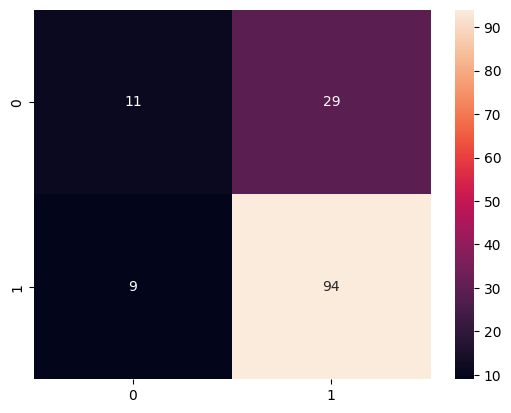

In [ ]:
from sklearn.metrics import confusion_matrix
log_cm=confusion_matrix(Y_test,log_y_pred)
sns.heatmap(log_cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(Y_test,log_y_pred))
print(precision_score(Y_test,log_y_pred))

0.7342657342657343
0.7642276422764228


In [ ]:
#knn algorithm
X_train.shape


(427, 10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=21,metric='minkowski')
knn_classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
knn_y_pred=knn_classifier.predict(X_test)

<Axes: >

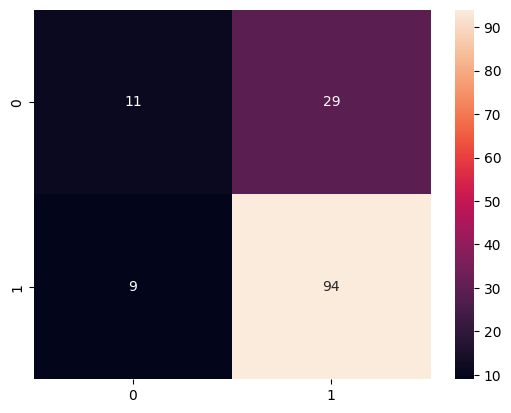

In [ ]:
from sklearn.metrics import confusion_matrix
knn_cm=confusion_matrix(Y_test,log_y_pred)
sns.heatmap(knn_cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(Y_test,knn_y_pred))
print(precision_score(Y_test,knn_y_pred))

0.7202797202797203
0.7560975609756098


In [ ]:
#SVM
from sklearn.svm import SVC
svm_classifier=SVC(kernel='rbf',random_state=0)
svm_classifier.fit(X_train,Y_train)

SVC(random_state=0)

In [ ]:
svm_y_pred=svm_classifier.predict(X_test)

<Axes: >

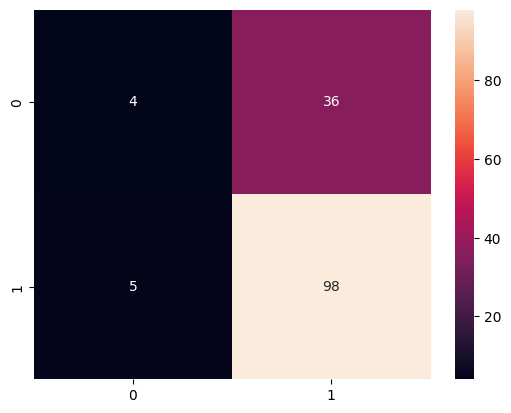

In [ ]:
from sklearn.metrics import confusion_matrix
svm_cm=confusion_matrix(Y_test,svm_y_pred)
sns.heatmap(svm_cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(Y_test,svm_y_pred))
print(precision_score(Y_test,svm_y_pred))

0.7132867132867133
0.7313432835820896


In [ ]:
#decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
dt_y_pred=dt_classifier.predict(X_test)

<Axes: >

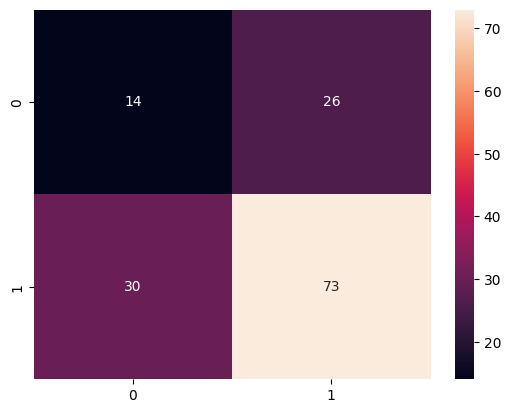

In [ ]:
from sklearn.metrics import confusion_matrix
dt_cm=confusion_matrix(Y_test,dt_y_pred)
sns.heatmap(dt_cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(Y_test,dt_y_pred))
print(precision_score(Y_test,dt_y_pred))

0.6083916083916084
0.7373737373737373


In [ ]:
#randomforest classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
rf_y_pred=rf_classifier.predict(X_test)

<Axes: >

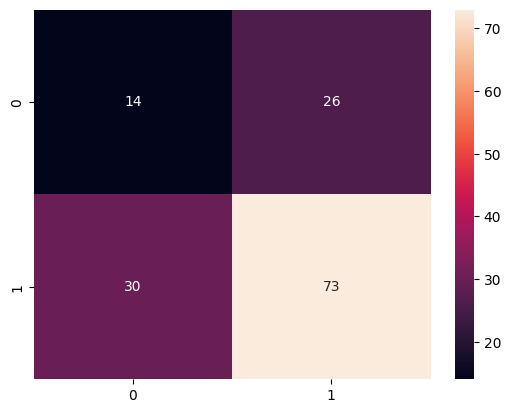

In [ ]:
from sklearn.metrics import confusion_matrix
rf_cm=confusion_matrix(Y_test,dt_y_pred)
sns.heatmap(rf_cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(Y_test,rf_y_pred))
print(precision_score(Y_test,rf_y_pred))

0.7202797202797203
0.7692307692307693


Artificial Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
#initialising the ANN
classifier=Sequential()
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=400,activation='relu',input_dim=10))
classifier.add(Dropout(rate=0.1))
#Adding second hidden layer
classifier.add(Dense(units=400,activation='relu'))
classifier.add(Dropout(rate=0.1))
#output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
14/14 [==============================] - 2s 12ms/step - loss: 0.5657 - accuracy: 0.6815
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.5019 - accuracy: 0.6885
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 0.4975 - accuracy: 0.7190
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.4825 - accuracy: 0.7354
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 0.4766 - accuracy: 0.7424
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.4628 - accuracy: 0.7564
Epoch 7/100
14/14 [==============================] - 0s 11ms/step - loss: 0.4632 - accuracy: 0.7611
Epoch 8/100
14/14 [==============================] - 0s 11ms/step - loss: 0.4513 - accuracy: 0.7775
Epoch 9/100
14/14 [==============================] - 0s 10ms/step - loss: 0.4415 - accuracy: 0.7752
Epoch 10/100
14/14 [==============================] - 0s 13ms/step - loss: 0.4304 - accuracy: 0.7892


In [ ]:
ann_y_pred=classifier.predict(X_test)

5/5 [==============================] - 0s 6ms/step


In [ ]:
ann_y_pred[0]

array([0.99999994], dtype=float32)

In [ ]:
ann_y_pred=ann_y_pred>=0.5

<Axes: >

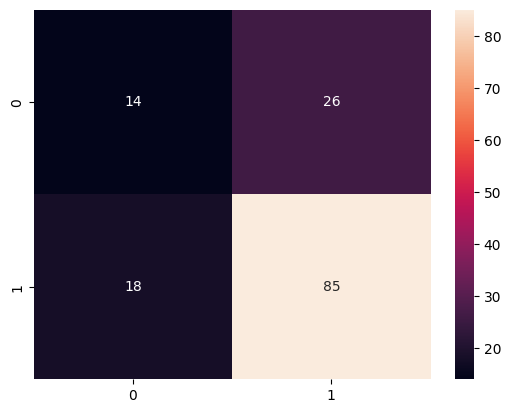

In [ ]:
from sklearn.metrics import confusion_matrix
ann_cm=confusion_matrix(Y_test,ann_y_pred)
sns.heatmap(ann_cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(Y_test,ann_y_pred))
print(precision_score(Y_test,ann_y_pred))

0.6923076923076923
0.7657657657657657


Saving the models

In [ ]:
import pickle
pickle.dump(knn_classifier,open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))